In [1]:
jpegpath = './data/lfw_funneled/'
binarypath = './data/parts_lfw_funneled_gt_images/'

In [2]:
!ls ./data/lfw_funneled/

AJ_Cook                             Joy_Bryant
AJ_Lamas                            Joy_Lee_Sadler
Aaron_Eckhart                       Juan_Antonio_Samaranch
Aaron_Guiel                         Juan_Carlos
Aaron_Patterson                     Juan_Carlos_Ferrero
Aaron_Peirsol                       Juan_Carlos_Morales
Aaron_Pena                          Juan_Carlos_Ortega
Aaron_Sorkin                        Juan_Fernandez
Aaron_Tippin                        Juan_Francisco_Palencia
Abba_Eban                           Juan_Ignacio_Chela
Abbas_Kiarostami                    Juan_Jose_Lucas
Abdel_Aziz_Al-Hakim                 Juan_Manuel_Marquez
Abdel_Madi_Shabneh                  Juan_Pablo_Montoya
Abdel_Nasser_Assidi                 Juan_Roman_Carrasco
Abdoulaye_Wade                      Juan_Roman_Riquelme
Abdul_Majeed_Shobokshi              Juan_Sanchez
Abdul_Rahman                        Juan_Valencia_Osorio
Abdulaziz_Kamilov                   Juanes
Abdullah                            Ju

Bruce_Gebhardt                      Martha_Lucia_Ramirez
Bruce_Lunsford                      Martha_Martinez_Flores
Bruce_Paltrow                       Martha_Sahagun_de_Fox
Bruce_Springsteen                   Martha_Smith
Bruce_Van_De_Velde                  Martha_Stewart
Bruce_Weber                         Martie_Maguire
Bruce_Willis                        Martin_Bandier
Bruna_Colosio                       Martin_Boryczewski
Bruno_Junquiera                     Martin_Brodeur
Bryan_Adams                         Martin_Brooke
Bryan_Chui                          Martin_Burnham
Bryan_Cooley                        Martin_Cauchon
Bryan_Murray                        Martin_Frost
Bryan_Thomas                        Martin_Gecht
Bryant_Young                        Martin_Hoellwarth
Bryce_Carmine                       Martin_Howard
Buck_Rodgers                        Martin_Keown
Bud_Selig                           Martin_Kristof
Budd_Schulberg                      Martin_Landau
Buddy_Ryan    

In [3]:
something = Image.open(binarypath + 'Abel_Pacheco_0001.png')
Image.fromarray(something)

NameError: name 'Image' is not defined

In [9]:
import cv2, math, time, warnings
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os.path as osp
from glob import glob
from tqdm import tqdm
import torch
from torch import tensor
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from utils.data_augumentation import Compose, Scale, RandomRotation, RandomMirror, Resize, Normalize_Tensor

%matplotlib inline
warnings.simplefilter('ignore')

In [4]:
# 0か1か2だけの画像データを作成する

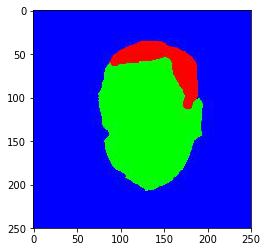

In [10]:
img = Image.open(binarypath + 'Abel_Pacheco_0001.jpg')
img = np.asarray(img)
plt.imshow(img)
plt.show();

In [11]:
img

array([[[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       ...,

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]]

(250, 250, 3)


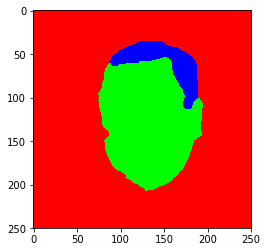

In [12]:
img = cv2.imread(binarypath + 'Abel_Pacheco_0001.ppm')
im = np.asarray(img)
print(im.shape)
plt.imshow(img)

AttributeError: 'numpy.ndarray' object has no attribute 'save'

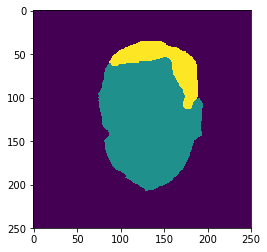

In [13]:
plt.imshow(np.argmax(im, axis=2))
np.argmax(im, axis=2).save('tmp.png')

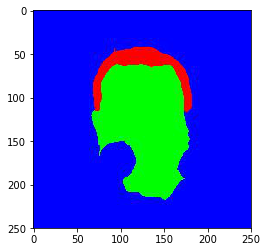

In [14]:
with open(binarypath + 'Abel_Pacheco_0004.jpg', 'rb') as f:
    im = Image.open(f)
    plt.imshow(im)

In [15]:
binary

NameError: name 'binary' is not defined

In [16]:
img = cv2.imdecode(arr, -1)

NameError: name 'arr' is not defined

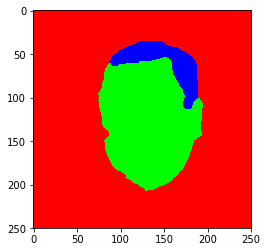

In [17]:
plt.imshow(img);

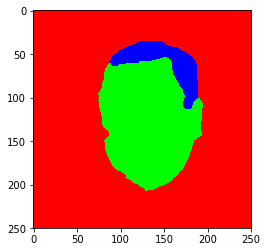

In [18]:
plt.imshow(np.array(img))

In [19]:
image = Image.open(jpegpath + 'Abel_Pacheco/Abel_Pacheco_0001.jpg')
image.show();

In [20]:
def make_datapath_list(jpegpath, annopath):
    train_img_list, val_img_list = [], []
    annopath_list = glob(annopath + '*.png')
    train_anno_list, val_anno_list = train_test_split(annopath_list, test_size=0.3)
    for file_path in train_anno_list:
        person_name = file_path.split('/')[3].replace('.png', '')
        specific_jpegpath = jpegpath + person_name[:-5] + '/' + person_name + '.jpg'
        train_img_list.append(specific_jpegpath)
    for file_path in val_anno_list:
        person_name = file_path.split('/')[3].replace('.png', '')
        specific_jpegpath = jpegpath + person_name[:-5] + '/' + person_name + '.jpg'
        val_img_list.append(specific_jpegpath)
    return train_img_list, train_anno_list, val_img_list, val_anno_list

In [21]:
train_img_list, train_anno_list, val_img_list, val_anno_list = make_datapath_list(jpegpath, binarypath)

print(train_img_list[0])
print(train_anno_list[0])

./data/lfw_funneled/Natasa_Micic/Natasa_Micic_0001.jpg
./data/parts_lfw_funneled_gt_images/Natasa_Micic_0001.png


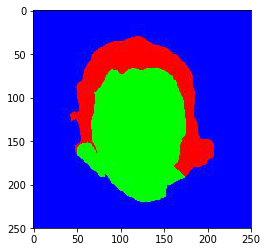

In [22]:
img = Image.open(train_anno_list[0])
plt.imshow(img)
plt.show();

In [23]:
np.array(img)[100]

array([[  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0, 254],
       [  0,   0

In [55]:
class DataTransform():
    """
    画像とアノテーションの前処理クラス。訓練時と検証時で異なる動作をする。
    画像のサイズをinput_size x input_sizeにする。
    訓練時はデータオーギュメンテーションする。


    Attributes
    ----------
    input_size : int
        リサイズ先の画像の大きさ。
    color_mean : (R, G, B)
        各色チャネルの平均値。
    color_std : (R, G, B)
        各色チャネルの標準偏差。
    """

    def __init__(self, input_size, color_mean, color_std):
        self.data_transform = {
            'train': Compose([
                #Scale(scale=[0.5, 1.5]),  # 画像の拡大
                RandomRotation(angle=[-10, 10]),  # 回転
                RandomMirror(),  # ランダムミラーee
                Resize(input_size),  # リサイズ(input_size)
                Normalize_Tensor(color_mean, color_std)  # 色情報の標準化とテンソル化
            ]),
            'val': Compose([
                Resize(input_size),  # リサイズ(input_size)
                Normalize_Tensor(color_mean, color_std)  # 色情報の標準化とテンソル化
            ])
        }

    def __call__(self, phase, img, anno_class_img):
        """
        Parameters
        ----------
        phase : 'train' or 'val'
            前処理のモードを指定。
        """
        return self.data_transform[phase](img, anno_class_img)

In [56]:
class FaceSegDataset(data.Dataset):
    def __init__(self, img_list, anno_list, phase, transform):
        self.img_list = img_list
        self.anno_list = anno_list
        self.phase = phase
        self.transform = transform

    def __len__(self):
        '''画像の枚数を返す'''
        return len(self.img_list)

    def __getitem__(self, index):
        '''
        前処理をした画像のTensor形式のデータとアノテーションを取得
        '''
        img, anno_class_img = self.pull_item(index)
        return img, anno_class_img

    def pull_item(self, index):
        '''画像のTensor形式のデータ、アノテーションを取得する'''

        # 1. 画像読み込み
        image_file_path = self.img_list[index]
        img = Image.open(image_file_path)   # [高さ][幅][色RGB]

        # 2. アノテーション画像読み込み
        anno_file_path = self.anno_list[index]
        anno_class_img = Image.open(anno_file_path) # [高さ][幅]
        anno_class_img = np.argmax(np.array(anno_class_img), axis=2)
        anno_class_img = Image.fromarray(np.uint8(anno_class_img))
        
        # 3. 前処理を実施
        img, anno_class_img = self.transform(self.phase, img, anno_class_img)
        
        return img, anno_class_img

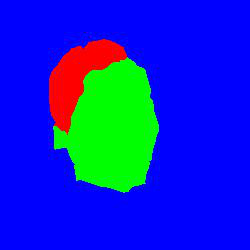

In [57]:
Image.open(train_anno_list[8])

In [58]:
train_anno_list

['./data/parts_lfw_funneled_gt_images/Natasa_Micic_0001.png',
 './data/parts_lfw_funneled_gt_images/Jeffrey_Scott_Postell_0001.png',
 './data/parts_lfw_funneled_gt_images/Jean_Chretien_0003.png',
 './data/parts_lfw_funneled_gt_images/Michael_Jordan_0004.png',
 './data/parts_lfw_funneled_gt_images/Eve_Pelletier_0001.png',
 './data/parts_lfw_funneled_gt_images/Annette_Bening_0002.png',
 './data/parts_lfw_funneled_gt_images/Ricardo_Lagos_0001.png',
 './data/parts_lfw_funneled_gt_images/Olene_Walker_0001.png',
 './data/parts_lfw_funneled_gt_images/Katie_Harman_0003.png',
 './data/parts_lfw_funneled_gt_images/Frank_Solich_0004.png',
 './data/parts_lfw_funneled_gt_images/Carolina_Moraes_0002.png',
 './data/parts_lfw_funneled_gt_images/Graham_Bentley_0001.png',
 './data/parts_lfw_funneled_gt_images/Hashim_Thaci_0002.png',
 './data/parts_lfw_funneled_gt_images/Martin_Scorsese_0006.png',
 './data/parts_lfw_funneled_gt_images/Arnie_Boehm_0001.png',
 './data/parts_lfw_funneled_gt_images/Dennis_Ku

In [59]:
# 動作確認

# (RGB)の色の平均値と標準偏差
color_mean = (0.485, 0.456, 0.406)
color_std = (0.229, 0.224, 0.225)

# データセット作成
train_dataset = FaceSegDataset(train_img_list, train_anno_list, phase="train", 
    transform=DataTransform(
        input_size=475, color_mean=color_mean, color_std=color_std))

val_dataset = FaceSegDataset(val_img_list, val_anno_list, phase="val", 
    transform=DataTransform(
        input_size=475, color_mean=color_mean, color_std=color_std))

# データの取り出し例
print(train_dataset.__getitem__(2)[0].size())
print(val_dataset.__getitem__(10)[1].shape)
print(val_dataset.__getitem__(10))

torch.Size([3, 475, 475])
torch.Size([475, 475])
(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.80

<function matplotlib.pyplot.show(*args, **kw)>

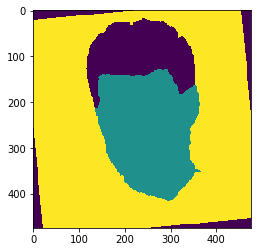

In [60]:
img = train_dataset.__getitem__(12)[1]
plt.imshow(img)
plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


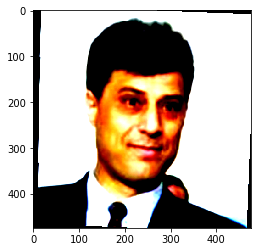

In [61]:
img = train_dataset.__getitem__(12)[0].permute(1, 2, 0)
plt.imshow(img);

In [62]:
batch_size = 2

train_dataloader = data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

val_dataloader = data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False)

# 辞書型変数にまとめる
dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}

In [65]:
from utils import PSPNet

# Fine Tuning
net = PSPNet(n_classes=150)

state_dict = torch.load("./weights/pspnet50_ADE20K.pth")
net.load_state_dict(state_dict)

n_classes = 3
net.decode_feature.classification = nn.Conv2d(
    in_channels=512, out_channels=n_classes, kernel_size=1, stride=1, padding=0)

net.aux.classification = nn.Conv2d(
    in_channels=256, out_channels=n_classes, kernel_size=1, stride=1, padding=0)

def weights_init(m):
    if isinstance(m, nn.Conv2d):
        nn.init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0.0)

net.decode_feature.classification.apply(weights_init)
net.aux.classification.apply(weights_init)

print('ネットワーク設定完了: 学習済みの重みをロードしました')

ネットワーク設定完了: 学習済みの重みをロードしました


In [66]:
class PSPLoss(nn.Module):
    """PSPNetの損失関数のクラスです。"""

    def __init__(self, aux_weight=0.4):
        super(PSPLoss, self).__init__()
        self.aux_weight = aux_weight  # aux_lossの重み

    def forward(self, outputs, targets):
        """
        損失関数の計算。

        Parameters
        ----------
        outputs : PSPNetの出力(tuple)
            (output=torch.Size([num_batch, 21, 475, 475]), output_aux=torch.Size([num_batch, 21, 475, 475]))。

        targets : [num_batch, 475, 4755]
            正解のアノテーション情報

        Returns
        -------
        loss : テンソル
            損失の値
        """

        loss = F.cross_entropy(outputs[0], targets, reduction='mean')
        loss_aux = F.cross_entropy(outputs[1], targets, reduction='mean')

        return loss+self.aux_weight*loss_aux


criterion = PSPLoss(aux_weight=0.4)

In [67]:
optimizer = optim.SGD([
    {'params': net.feature_conv.parameters(), 'lr': 1e-3},
    {'params': net.feature_res_1.parameters(), 'lr': 1e-3},
    {'params': net.feature_res_2.parameters(), 'lr': 1e-3},
    {'params': net.feature_dilated_res_1.parameters(), 'lr': 1e-3},
    {'params': net.feature_dilated_res_2.parameters(), 'lr': 1e-3},
    {'params': net.pyramid_pooling.parameters(), 'lr': 1e-3},
    {'params': net.decode_feature.parameters(), 'lr': 1e-2},
    {'params': net.aux.parameters(), 'lr': 1e-2},
], momentum=0.9, weight_decay=0.0001)


# スケジューラーの設定
def lambda_epoch(epoch):
    max_epoch = 30
    return math.pow((1-epoch/max_epoch), 0.9)


scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_epoch)

In [68]:
# モデルを学習させる関数を作成


def train_model(net, dataloaders_dict, criterion, scheduler, optimizer, num_epochs):

    # GPUが使えるかを確認
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("使用デバイス：", device)

    # ネットワークをGPUへ
    net.to(device)

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # 画像の枚数
    num_train_imgs = len(dataloaders_dict["train"].dataset)
    num_val_imgs = len(dataloaders_dict["val"].dataset)
    batch_size = dataloaders_dict["train"].batch_size

    # イテレーションカウンタをセット
    iteration = 1
    logs = []

    # multiple minibatch
    batch_multiplier = 3

    # epochのループ
    for epoch in range(num_epochs):

        # 開始時刻を保存
        t_epoch_start = time.time()
        t_iter_start = time.time()
        epoch_train_loss = 0.0  # epochの損失和
        epoch_val_loss = 0.0  # epochの損失和

        print('-------------')
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-------------')

        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()  # モデルを訓練モードに
                scheduler.step()  # 最適化schedulerの更新
                optimizer.zero_grad()
                print('（train）')

            else:
                if((epoch+1) % 5 == 0):
                    net.eval()   # モデルを検証モードに
                    print('-------------')
                    print('（val）')
                else:
                    # 検証は5回に1回だけ行う
                    continue

            # データローダーからminibatchずつ取り出すループ
            count = 0  # multiple minibatch
            for imges, anno_class_imges in dataloaders_dict[phase]:
                # ミニバッチがサイズが1だと、バッチノーマライゼーションでエラーになるのでさける
                if imges.size()[0] == 1:
                    continue

                # GPUが使えるならGPUにデータを送る
                imges = imges.to(device)
                anno_class_imges = anno_class_imges.to(device)

                
                # multiple minibatchでのパラメータの更新
                if (phase == 'train') and (count == 0):
                    optimizer.step()
                    optimizer.zero_grad()
                    count = batch_multiplier

                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(imges)
                    loss = criterion(
                        outputs, anno_class_imges.long()) / batch_multiplier

                    # 訓練時はバックプロパゲーション
                    if phase == 'train':
                        loss.backward()  # 勾配の計算
                        count -= 1  # multiple minibatch

                        if (iteration % 10 == 0):  # 10iterに1度、lossを表示
                            t_iter_finish = time.time()
                            duration = t_iter_finish - t_iter_start
                            print('イテレーション {} || Loss: {:.4f} || 10iter: {:.4f} sec.'.format(
                                iteration, loss.item()/batch_size*batch_multiplier, duration))
                            t_iter_start = time.time()

                        epoch_train_loss += loss.item() * batch_multiplier
                        iteration += 1

                    # 検証時
                    else:
                        epoch_val_loss += loss.item() * batch_multiplier

        # epochのphaseごとのlossと正解率
        t_epoch_finish = time.time()
        print('-------------')
        print('epoch {} || Epoch_TRAIN_Loss:{:.4f} ||Epoch_VAL_Loss:{:.4f}'.format(
            epoch+1, epoch_train_loss/num_train_imgs, epoch_val_loss/num_val_imgs))
        print('timer:  {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
        t_epoch_start = time.time()

        # ログを保存
        log_epoch = {'epoch': epoch+1, 'train_loss': epoch_train_loss /
                     num_train_imgs, 'val_loss': epoch_val_loss/num_val_imgs}
        logs.append(log_epoch)
        df = pd.DataFrame(logs)
        df.to_csv("log_output.csv")

    # 最後のネットワークを保存する
    torch.save(net.state_dict(), 'weights/pspnet50_' +
               str(epoch+1) + '.pth')


In [69]:
num_epochs = 30
train_model(net, dataloaders_dict, criterion, scheduler, optimizer, num_epochs=num_epochs)

使用デバイス： cpu
-------------
Epoch 1/30
-------------
（train）
イテレーション 10 || Loss: 0.4341 || 10iter: 686.9204 sec.


KeyboardInterrupt: 